# Developing the script for viewing NetCDF files

In [1]:
# imports
from importlib import reload
from importlib import resources
import os
import json
import numpy as np
import numpy.ma as ma

from matplotlib import pyplot as plt
import cartopy.crs as ccrs

import xarray

from remote_sensing import io as rs_io

In [2]:
#%matplotlib ipympl

# Load a large, gridded file

In [2]:
dfile = os.path.join(os.getenv('OS_RS'), 'PODAAC', 'H09-AHI-L3C-ACSPO-v2.90', 
                     '20250207040000-STAR-L3C_GHRSST-SSTsubskin-AHI_H09-ACSPO_V2.90-v02.0-fv01.0.nc')
ds = xarray.open_dataset(dfile)
ds

<xarray.Dataset> Size: 9GB
Dimensions:                  (lon: 18000, lat: 9000, time: 1)
Coordinates:
  * lon                      (lon) float32 72kB -180.0 -180.0 ... 180.0 180.0
  * lat                      (lat) float32 36kB 89.99 89.97 ... -89.97 -89.99
  * time                     (time) datetime64[ns] 8B 2025-02-07T04:00:00
Data variables: (12/13)
    quality_level            (time, lat, lon) float32 648MB ...
    l2p_flags                (time, lat, lon) int16 324MB ...
    or_number_of_pixels      (time, lat, lon) float64 1GB ...
    sea_surface_temperature  (time, lat, lon) float32 648MB ...
    dt_analysis              (time, lat, lon) float32 648MB ...
    satellite_zenith_angle   (time, lat, lon) float32 648MB ...
    ...                       ...
    sses_standard_deviation  (time, lat, lon) float32 648MB ...
    wind_speed               (time, lat, lon) float32 648MB ...
    sst_dtime                (time, lat, lon) timedelta64[ns] 1GB ...
    crs                      int32 4B ...
    sst_gradient_magnitude   (time, lat, lon) float32 648MB ...
    sst_front_position       (time, lat, lon) float32 648MB ...
Attributes: (12/56)
    Conventions:                CF-1.7, ACDD-1.3
    acknowledgement:            Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    SSTs are a weighted average of the SSTs of co...
    creator_email:              Alex.Ignatov@noaa.gov
    creator_name:               Alex Ignatov
    ...                         ...
    col_start:                  0
    col_count:                  18000
    l3u_bias_subskin_night:     0.0
    l3u_bias_subskin_day:       0.0
    l3u_bias_depth_night:       0.0
    l3u_bias_depth_day:         0.0

# Slice me

In [3]:
sst = ds.sea_surface_temperature.sel(lat=slice(23,18),  lon=slice(127., 134.)).isel(time=0)
sst

<xarray.DataArray 'sea_surface_temperature' (lat: 250, lon: 350)> Size: 350kB
[87500 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 1kB 127.0 127.0 127.1 127.1 ... 133.9 134.0 134.0
  * lat      (lat) float32 1kB 22.99 22.97 22.95 22.93 ... 18.05 18.03 18.01
    time     datetime64[ns] 8B 2025-02-07T04:00:00
Attributes:
    comment:                SST obtained by regression with buoy measurements...
    long_name:              sea surface sub-skin temperature
    source:                 NOAA
    standard_name:          sea_surface_subskin_temperature
    units:                  kelvin
    valid_max:              32767
    valid_min:              -32767
    grid_mapping:           crs
    coverage_content_type:  physicalMeasurement

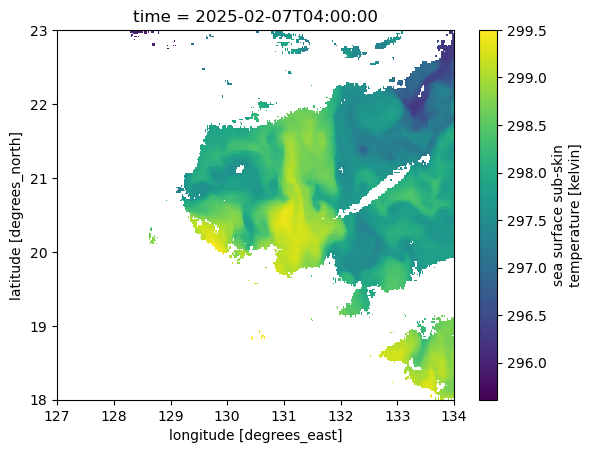

In [4]:
sst.plot()

In [5]:
sst.lat

<xarray.DataArray 'lat' (lat: 250)> Size: 1kB
array([22.99, 22.97, 22.95, ..., 18.05, 18.03, 18.01], dtype=float32)
Coordinates:
  * lat      (lat) float32 1kB 22.99 22.97 22.95 22.93 ... 18.05 18.03 18.01
    time     datetime64[ns] 8B 2025-02-07T04:00:00
Attributes:
    long_name:              latitude
    comment:                Latitudes for locating data
    units:                  degrees_north
    axis:                   Y
    valid_min:              -90.0
    valid_max:              90.0
    standard_name:          latitude
    coverage_content_type:  coordinate

----

# From datafile

In [21]:
reload(rs_healpix)
rs_hpx2 = rs_healpix.RS_Healpix.from_dataarray_file(dfile, 'sea_surface_temperature',
    lat_slice=slice(23,18),  lon_slice=slice(127., 134.), time_isel=0)
rs_hpx2

<RS_Healpix: nside=2048, npix=50331648
 file=20250202200000-STAR-L3C_GHRSST-SSTsubskin-AHI_H09-ACSPO_V2.90-v02.0-fv01.0.nc, var=sea_surface_temperature>